In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [96]:
def permutation_replicate(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def diff_frac(data_A, data_B):
    frac_A=np.sum(data_A) / len(data_A)
    frac_B=np.sum(data_B) / len(data_B)
    return frac_B-frac_A

def ecdf(data):
    #Compute ECDF for a one-dimensional array of measurements.
    # Number of data points: n
    n =len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n

    return x, y

In [97]:
perm_replicates=np.empty(10000)
clickthrough_A=[45]
clickthrough_B=[67]

for i in range(10000):
    perm_replicates[i]=permutation_replicate(
    clickthrough_A, clickthrough_B, diff_frac)

diff_frac_obs=diff_frac(clickthrough_A,clickthrough_B)

p_value=np.sum(perm_replicates>=diff_frac_obs)/10000

print(p_value)

print("The website change did not affect clickthroughs")

0.5061
The website change did not affect clickthroughs


In [98]:
#civil rights act of 1964
#153 house democrats
#136 republicans
#91 democrats voted
#35 republicans voted
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
    return perm_replicates

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac


dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)


#perm_replicates=np.empty(10000)
# Computefor i in range(10000):
    # perm_replicates[i]=permutation_replicate(
    #dems,reps, diff_frac)

perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)
# print(perm_replicates)
# print(perm_replicates.shape)
p_value = np.sum(perm_replicates <= 153/244) / len(perm_replicates)

print("p-value=",p_value)

print("party affliation did affect vote")


p-value= 0.0002
party affliation did affect vote


In [99]:
#the pitcher was no longer allowed to spit on or scuff the ball, 
#an activity that greatly favors pitchers.

#did the rule changes result in a slower rate of no-hitters 
#(longer average time between no-hitters)

#nht = no hitter time

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
    return diff

nht_dead=[-1,894,10,130,1,934,29,6,485,254,372,81,191,355,180,286,47,269,361,173,246,492,462,1319,58,297,31,2970,640,237,434,570,77,271,563,3365,89,0,379,221,479,367,628,843,1613,1101,215,684,814,278,324,161,219,545,715,966,624, 29,450,107,20,91,1325,124,1468,104,1309,429,62,1878,1104,123,251,93,188,983,166,96,702,23,524,26,299,59,39,12,2,308,1114,813,887]
nht_live=[645,2088,42,2090,11,886,1665,1084,2900,2432,750,4021,1070,1765,1322,26,548,1525,77,2181,2752,127,2147,211,41,1575,151,479
,697,557,2267,542,392,73,603,233,255,528,397,1529,1023,1194,462,583,37,943,996,480,1497,717,224,219,1531,498,44,288
,267,600,52,269,1086,386,176,2199,216,54,675,1243,463,650,171,327,110,774,509,8,197,136,12,1124,64,380,811,232
,192,731,715,226,605,539,1491,323,240,179,702,156,82,1397,354,778,603,1001,385,986,203,149,576,445,180,1403,252,675
,1351,2983,1568,45,899,3260,1025,31,100,2055,4043,79,238,3931,2351,595,110,215,0,563,206,660,242,577,179,157,192,192
,1848,792,1693,55,388,225,1134,1172,1555,31,1582,1044,378,1687,2915,280,765,2819,511,1521,745,2491,580,2072,6450,578,745,1075
,1103,1549,1520,138,1202,296,277,351,391,950,459,62,1056,1128,139,420,87,71,814,603,1349,162,1027,783,326,101,876,381
,905,156,419,239,119,129,467]


nht_diff_obs = diff_of_means(nht_dead, nht_live)

print(nht_diff_obs)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live,
                                 diff_of_means, size=10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =', p)

print("the rule changes resulted in a slower rate of no-hitters")


-345.0011367942402
p-val = 0.0
the rule changes resulted in a slower rate of no-hitters


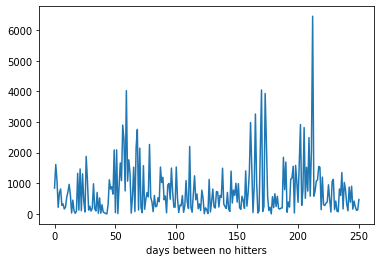

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


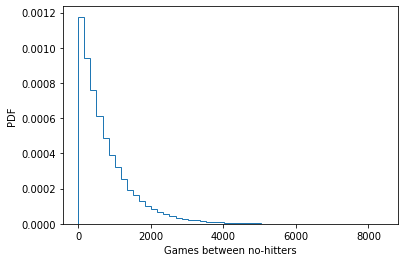

In [100]:
nht=[843,1613,1101,215,684,814,278,324,161,219,545,715,966,624
,29,450,107,20,91,1325,124,1468,104,1309,429,62,1878,1104
,123,251,93,188,983,166,96,702,23,524,26,299,59,39
,12,2,308,1114,813,887,645,2088,42,2090,11,886,1665,1084
,2900,2432,750,4021,1070,1765,1322,26,548,1525,77,2181,2752,127
,2147,211,41,1575,151,479,697,557,2267,542,392,73,603,233
,255,528,397,1529,1023,1194,462,583,37,943,996,480,1497,717
,224,219,1531,498,44,288,267,600,52,269,1086,386,176,2199
,216,54,675,1243,463,650,171,327,110,774,509,8,197,136
,12,1124,64,380,811,232,192,731,715,226,605,539,1491,323
,240,179,702,156,82,1397,354,778,603,1001,385,986,203,149
,576,445,180,1403,252,675,1351,2983,1568,45,899,3260,1025,31
,100,2055,4043,79,238,3931,2351,595,110,215,0,563,206,660
,242,577,179,157,192,192,1848,792,1693,55,388,225,1134,1172
,1555,31,1582,1044,378,1687,2915,280,765,2819,511,1521,745,2491
,580,2072,6450,578,745,1075,1103,1549,1520,138,1202,296,277,351
,391,950,459,62,1056,1128,139,420,87,71,814,603,1349,162
,1027,783,326,101,876,381,905,156,419,239,119,129,467]

plt.plot(nht)
plt.xlabel('days between no hitters')
plt.show()
tau = np.mean(nht)
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, normed=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

